# 1_EDA(1) : 명사, 형태소 분석
references :  
https://wikidocs.net/book/2155  
https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools   
https://skyjwoo.tistory.com/entry/%EC%9E%90%EC%97%B0%EC%96%B4-%EC%B2%98%EB%A6%AC-EDAExploratory-Data-Analysis  
https://dacon.io/competitions/official/235884/codeshare/4739

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import sklearn as sk

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

tensorflow : 머신러닝, 딥러닝 오픈소스 라이브러리  
keras : tensorflow 코드를 훨씬 간단하게 작성 가능 (tf.keras)  
gensim : 머신러닝을 사용항 토픽 모델링과 자연어 처리 수행 가능  
sckikit-learn : 머신러닝 모듈 불러오기 가능  
NLTK : 자연어 처리를 위한 파이썬 패키지  
KoLNPY : 한국어 자연어 처리를 위한 형태소 분석기 패키지

In [15]:
!pip install konlpy

In [4]:
!pip install nltk gensim pyldavis wordcloud textblob spacy textstat


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'c:\\programdata\\anaconda3\\lib\\site-packages\\__pycache__\\typing_extensions.cpython-39.pyc'
Consider using the `--user` option or check the permissions.




  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136904 sha256=2b8ee17fe91786b4767251884be1d870d9725eead20c102c27dab8b342609cae
  Stored in directory: c:\users\kimch\appdata\local\pip\cache\wheels\57\a4\86\d10c6c2e0bf149fbc0afb0aa5a6528ac35b30a133a0270c477
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20445 sha256=8a01d2e1ecbd6e5d00edc22293b7cdd838faf541cba23e94ae03ea4b6e2dcf6e
  Stored in directory: c:\users\kimch\appdata\local\pip\cache\wheels\99\66\48\d7ce0c6927f6abf167bbcdee537affc7b92c03632f78028411
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3530 sha256=ce56d204d5841475d17842c347b68af385e3c51df95906bd53e15e80db012ad3
  Stored in directory: c:\users\kimch\appdata\local\pip\cache\wheels\d9\c7\71\db1d4646d963b34c530667501d3d6f34c0825eaffae2f0f2cb
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=c6ec95a93cfacf569074dbe2bcd68407b9b3a90f818c682f32bf0e5ca706

In [3]:
news_df = pd.read_csv("C:/Users/kimch/Desktop/NLP_news_topic_classification/train_data.csv")
news_df

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4
...,...,...,...
45649,45649,KB금융 미국 IB 스티펠과 제휴…선진국 시장 공략,1
45650,45650,1보 서울시교육청 신종코로나 확산에 개학 연기·휴업 검토,2
45651,45651,게시판 키움증권 2020 키움 영웅전 실전투자대회,1
45652,45652,답변하는 배기동 국립중앙박물관장,2


In [4]:
# test는 topic index 안되어 있음 -> train 에서 다시 train/valid/test로 나눠야할 듯
test = pd.read_csv("C:/Users/kimch/Desktop/NLP_news_topic_classification/test_data.csv")
test

,index,title
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간
...,...,...
9126,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여
9127,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합
9128,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개
9129,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계


In [5]:
topic = pd.read_csv("C:/Users/kimch/Desktop/NLP_news_topic_classification/topic_dict.csv")
topic

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


## 결측치 확인

In [6]:
news_df["topic_idx"].isna().sum()
# 결측치 없음

0

## 뉴스 토픽 그룹 비율 확인

In [7]:
df = news_df.groupby("topic_idx").count()
df["topic"] = topic["topic"]
df.set_index("topic", inplace=True)
df = df[["title"]]
df["proportion(%)"] = [round(df["title"][i]/sum(df["title"])*100, 2) for i in range(7)]
df

,title,proportion(%)
topic,,
IT과학,4824,10.57
경제,6222,13.63
사회,7362,16.13
생활문화,5933,13.00
세계,7629,16.71
스포츠,6933,15.19
정치,6751,14.79


## Text Statistics

### - 제목 길이 분포 (character level)

Text(0, 0.5, 'frequency')

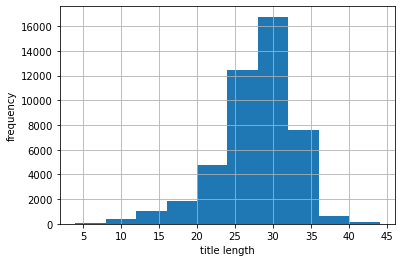

In [8]:
ax = news_df["title"].str.len().hist()

ax.set_xlabel('title length')
ax.set_ylabel('frequency')

### - 토큰 수 분포 (word level)

Text(0, 0.5, 'frequency')

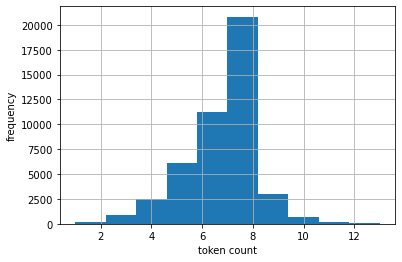

In [9]:
# 토큰 : 단어, 단어구, 의미를 갖는 문자열 등을 토큰으로 설정 후 토큰화 할 수 있다
# 단어 토큰화
ax = news_df['title'].str.split().map(lambda x: len(x)).hist()

ax.set_xlabel('token count')
ax.set_ylabel('frequency')

### - 토큰 길이 분포 (word level)

Text(0, 0.5, 'frequency')

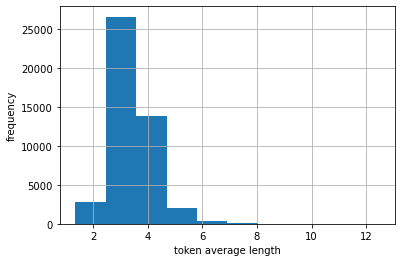

In [10]:
# 토큰별 길이 평균
ax = news_df["title"].str.split().\
    apply(lambda x : [len(i) for i in x]).\
    map(lambda x : np.mean(x)).hist()

ax.set_xlabel('token average length')
ax.set_ylabel('frequency')

## topic별 분석

형태소 분석에 konlpy, Mecab 등이 많이 쓰이는 것 같지만 설치해서 하는 것은 계속 오류가 나고 복잡해서 eunjeon에서 Mecab을 불러오는 식으로 분석함

In [7]:
itsci = news_df[news_df["topic_idx"]==0]
econ = news_df[news_df["topic_idx"]==1]
society = news_df[news_df["topic_idx"]==2]
lifestyle = news_df[news_df["topic_idx"]==3]
world = news_df[news_df["topic_idx"]==4]
sports = news_df[news_df["topic_idx"]==5]
politic = news_df[news_df["topic_idx"]==6]

In [8]:
from eunjeon import Mecab
m = Mecab()

In [9]:
import collections
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
m.pos('품사 태깅을 합니다')

[('품사', 'NNG'), ('태', 'NNG'), ('깅', 'UNKNOWN'), ('을', 'JKO'), ('합니다', 'VV+EC')]

In [14]:
m.morphs("형태소 분리를 지원합니다")

['형태소', '분리', '를', '지원', '합니다']

In [15]:
m.nouns("명사에 해당하는 형태소만 추출합니다")

['명사', '해당', '형태소', '추출']

In [10]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['DejaVu Sans',
 'cmr10',
 'STIXSizeThreeSym',
 'cmmi10',
 'DejaVu Serif',
 'STIXNonUnicode',
 'STIXSizeTwoSym',
 'STIXNonUnicode',
 'STIXGeneral',
 'STIXSizeOneSym',
 'cmsy10',
 'cmex10',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'STIXSizeFiveSym',
 'cmss10',
 'DejaVu Sans',
 'STIXGeneral',
 'DejaVu Serif Display',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'cmtt10',
 'STIXNonUnicode',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'STIXGeneral',
 'DejaVu Serif',
 'DejaVu Serif',
 'cmb10',
 'DejaVu Sans Display',
 'Californian FB',
 'HCR Batang',
 'Century Schoolbook',
 'Bell MT',
 'HYGothic-Medium',
 'Franklin Gothic Heavy',
 'HP Simplified',
 'Wingdings 2',
 'Constantia',
 'Segoe Print',
 'Gill Sans MT',
 'Segoe UI Historic',
 'Times New Roman Uni',
 'Segoe UI',
 'Trebuchet MS',
 'Candara',
 'Webdings',
 'Californian FB',
 'Mongolian Baiti',
 'Edw

In [27]:
plt.rcParams["font.family"] = 'batang'

In [68]:
!pip install wordcloud


  Using cached wordcloud-1.8.2.2-cp39-cp39-win_amd64.whl (153 kB)


In [69]:
from wordcloud import WordCloud

## - topic별 명사 분석 
명사 추출 > 전체 코퍼스 구축 > 개수 세기 > 시각화

### IT과학

<AxesSubplot:>

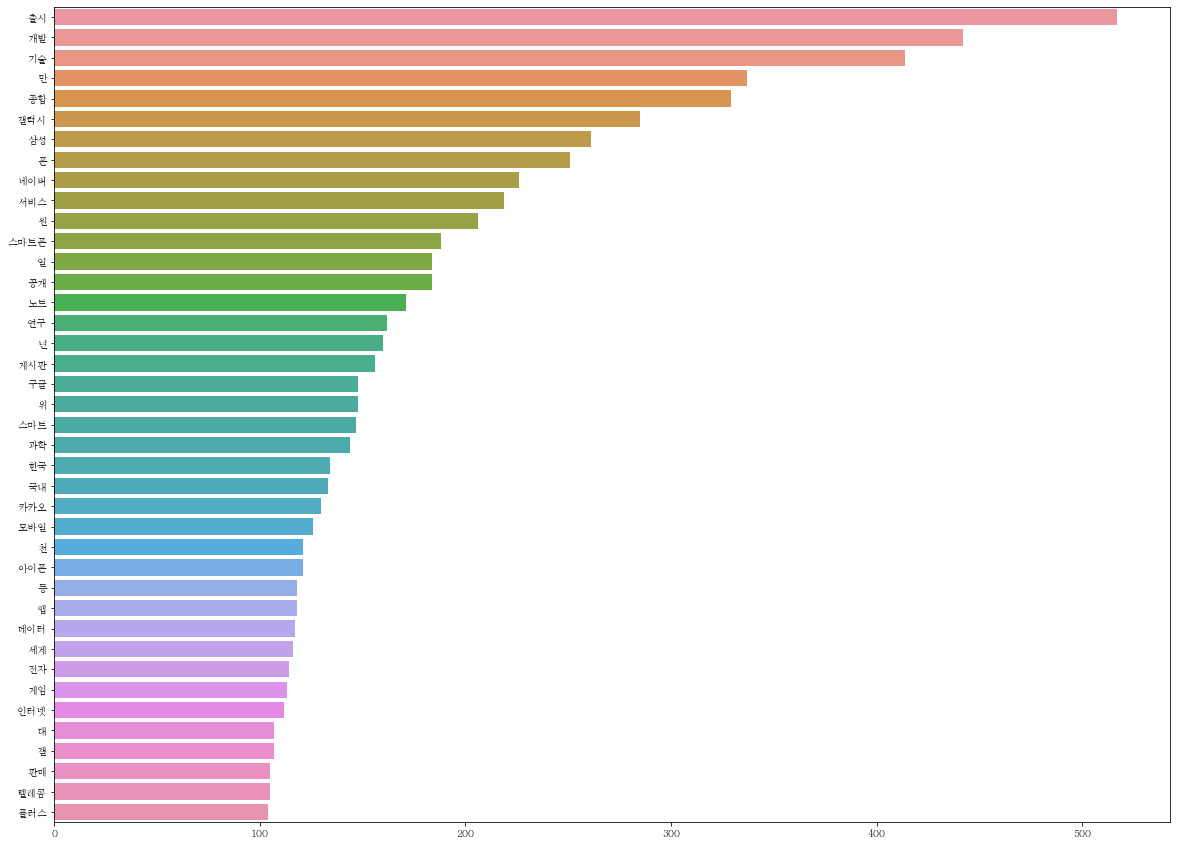

In [11]:
itsci_title = itsci["title"].to_list()
itsci_n_corpus = []

for t in itsci_title:
    itsci_n_corpus += m.nouns(t)
    
itsci_count = collections.Counter(itsci_n_corpus)
itsci_most = itsci_count.most_common()

x, y = [], []
for word,count in itsci_most[:40]:
    x.append(word)
    y.append(count)
    
plt.rcParams['font.family'] = 'batang'
plt.figure(figsize=(20,15))
sns.barplot(x=y, y=x)

In [78]:
def show_wordcloud(data):
    wordcloud = WordCloud(font_path="batang",
    background_color = 'white',
    max_words = 100,
    max_font_size=30,
    scale=3,
    random_state=1)
    
    wordcloud = wordcloud.generate(str(data))
    
    fig = plt.figure(1, figsize=(12,12))
    plt.rcParams['font.family'] = 'batang'
    plt.axis('off')
    
    plt.imshow(wordcloud)
    plt.show()

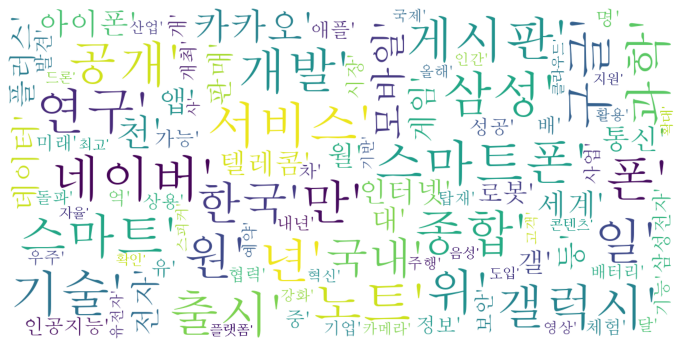

In [79]:
show_wordcloud(itsci_most)

In [54]:
# 기술용어, 회사, 제품, 몇몇 의존명사들은 제외해서 봐야할 듯 하다 (폰, 앱, 갤럭시->갤 등은 중요해보임)
itsci_most[:40]

[('출시', 517),
 ('개발', 442),
 ('기술', 414),
 ('만', 337),
 ('종합', 329),
 ('갤럭시', 285),
 ('삼성', 261),
 ('폰', 251),
 ('네이버', 226),
 ('서비스', 219),
 ('원', 206),
 ('스마트폰', 188),
 ('일', 184),
 ('공개', 184),
 ('노트', 171),
 ('연구', 162),
 ('년', 160),
 ('게시판', 156),
 ('구글', 148),
 ('위', 148),
 ('스마트', 147),
 ('과학', 144),
 ('한국', 134),
 ('국내', 133),
 ('카카오', 130),
 ('모바일', 126),
 ('천', 121),
 ('아이폰', 121),
 ('등', 118),
 ('앱', 118),
 ('데이터', 117),
 ('세계', 116),
 ('전자', 114),
 ('게임', 113),
 ('인터넷', 112),
 ('대', 107),
 ('갤', 107),
 ('판매', 105),
 ('텔레콤', 105),
 ('플러스', 104)]

### 경제

<AxesSubplot:>

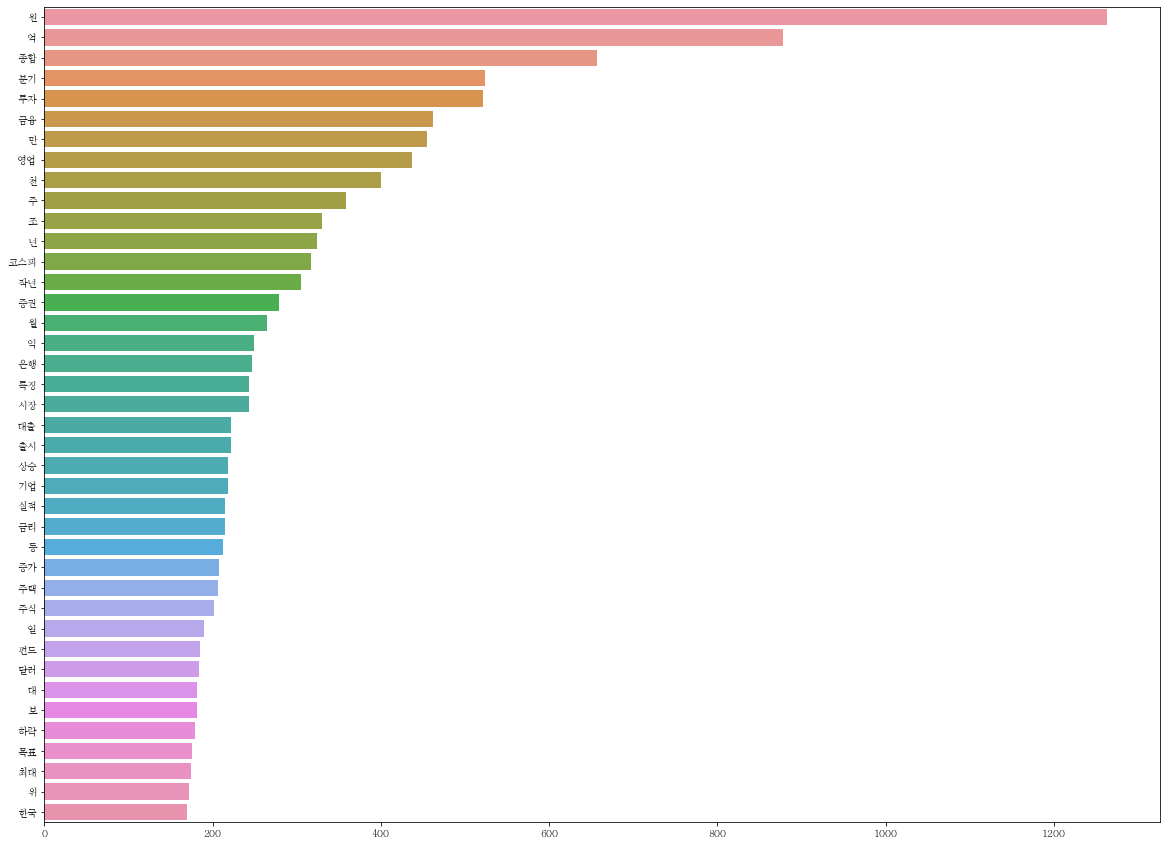

In [13]:
econ_title = econ["title"].to_list()
econ_n_corpus = []

for t in econ_title:
    econ_n_corpus += m.nouns(t)
    
econ_count = collections.Counter(econ_n_corpus)
econ_most = econ_count.most_common()  # 빈도순 추출

x, y = [], []
for word, count in econ_most[:40]:
    x.append(word)
    y.append(count)
    
plt.rcParams["font.family"] = 'batang'
plt.figure(figsize=(20,15))
sns.barplot(x=y, y=x)

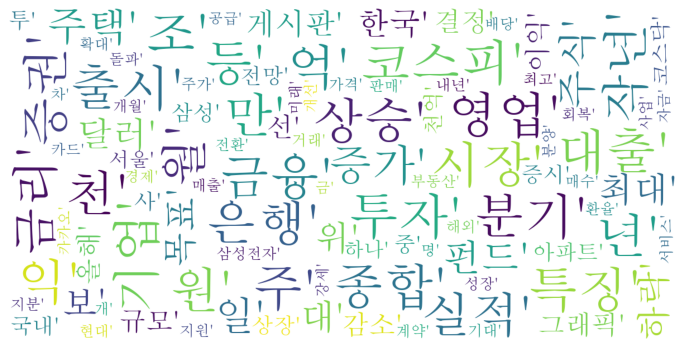

In [80]:
show_wordcloud(econ_most)

In [56]:
# 숫자단위나 화폐단위,날짜 등의 단어가 많이 들어감 
econ_most[:40]

[('원', 1263),
 ('억', 878),
 ('종합', 657),
 ('분기', 524),
 ('투자', 522),
 ('금융', 462),
 ('만', 455),
 ('영업', 437),
 ('천', 400),
 ('주', 359),
 ('조', 330),
 ('년', 324),
 ('코스피', 317),
 ('작년', 305),
 ('증권', 279),
 ('월', 265),
 ('익', 249),
 ('은행', 247),
 ('특징', 243),
 ('시장', 243),
 ('대출', 222),
 ('출시', 222),
 ('상승', 219),
 ('기업', 219),
 ('실적', 215),
 ('금리', 215),
 ('등', 213),
 ('증가', 208),
 ('주택', 206),
 ('주식', 202),
 ('일', 190),
 ('펀드', 185),
 ('달러', 184),
 ('대', 181),
 ('보', 181),
 ('하락', 179),
 ('목표', 176),
 ('최대', 174),
 ('위', 172),
 ('한국', 170)]

### 사회

<AxesSubplot:>

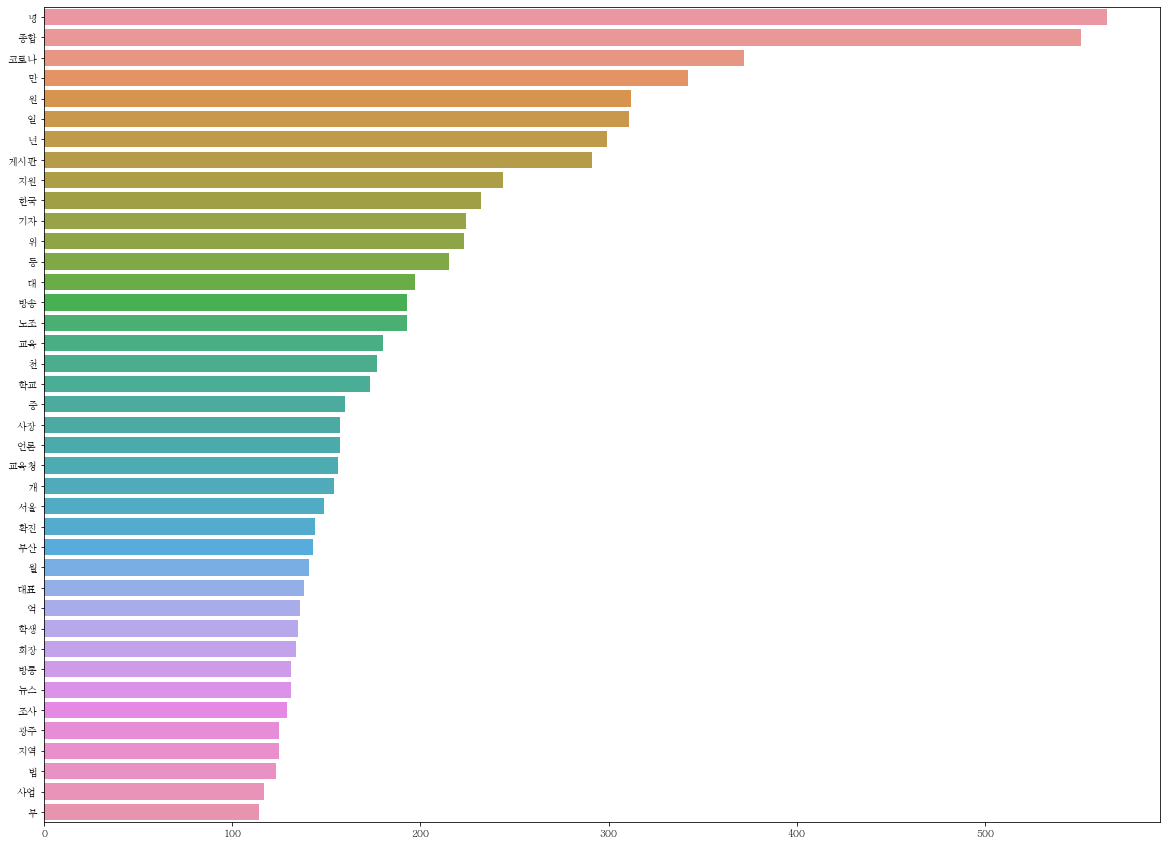

In [15]:
society_title = society["title"].to_list()
society_n_corpus = []

for t in society_title:
    society_n_corpus += m.nouns(t)
    
society_count = collections.Counter(society_n_corpus)
society_most = society_count.most_common()

x, y = [], []
for word, count in society_most[:40]:
    x.append(word)
    y.append(count)
    
plt.rcParams["font.family"] = 'batang'
plt.figure(figsize=(20,15))
sns.barplot(x=y, y=x)

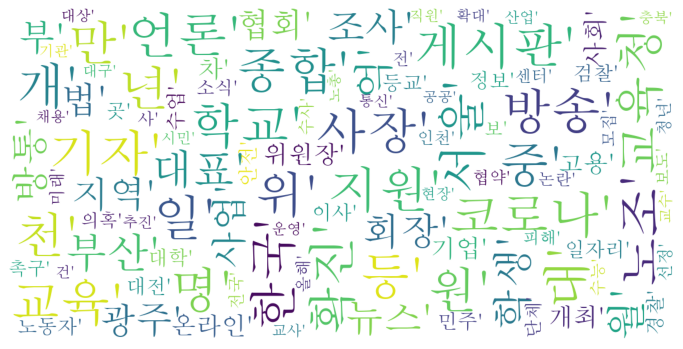

In [81]:
show_wordcloud(society_most)

In [58]:
# 지역 이름, 코로나 시기 특수성을 보이는 단어들, 숫자단위가 경제 토픽과 겹침 
society_most[:40]

[('명', 565),
 ('종합', 551),
 ('코로나', 372),
 ('만', 342),
 ('원', 312),
 ('일', 311),
 ('년', 299),
 ('게시판', 291),
 ('지원', 244),
 ('한국', 232),
 ('기자', 224),
 ('위', 223),
 ('등', 215),
 ('대', 197),
 ('방송', 193),
 ('노조', 193),
 ('교육', 180),
 ('천', 177),
 ('학교', 173),
 ('중', 160),
 ('사장', 157),
 ('언론', 157),
 ('교육청', 156),
 ('개', 154),
 ('서울', 149),
 ('확진', 144),
 ('부산', 143),
 ('월', 141),
 ('대표', 138),
 ('억', 136),
 ('학생', 135),
 ('회장', 134),
 ('방통', 131),
 ('뉴스', 131),
 ('조사', 129),
 ('광주', 125),
 ('지역', 125),
 ('법', 123),
 ('사업', 117),
 ('부', 114)]

### 생활문화

<AxesSubplot:>

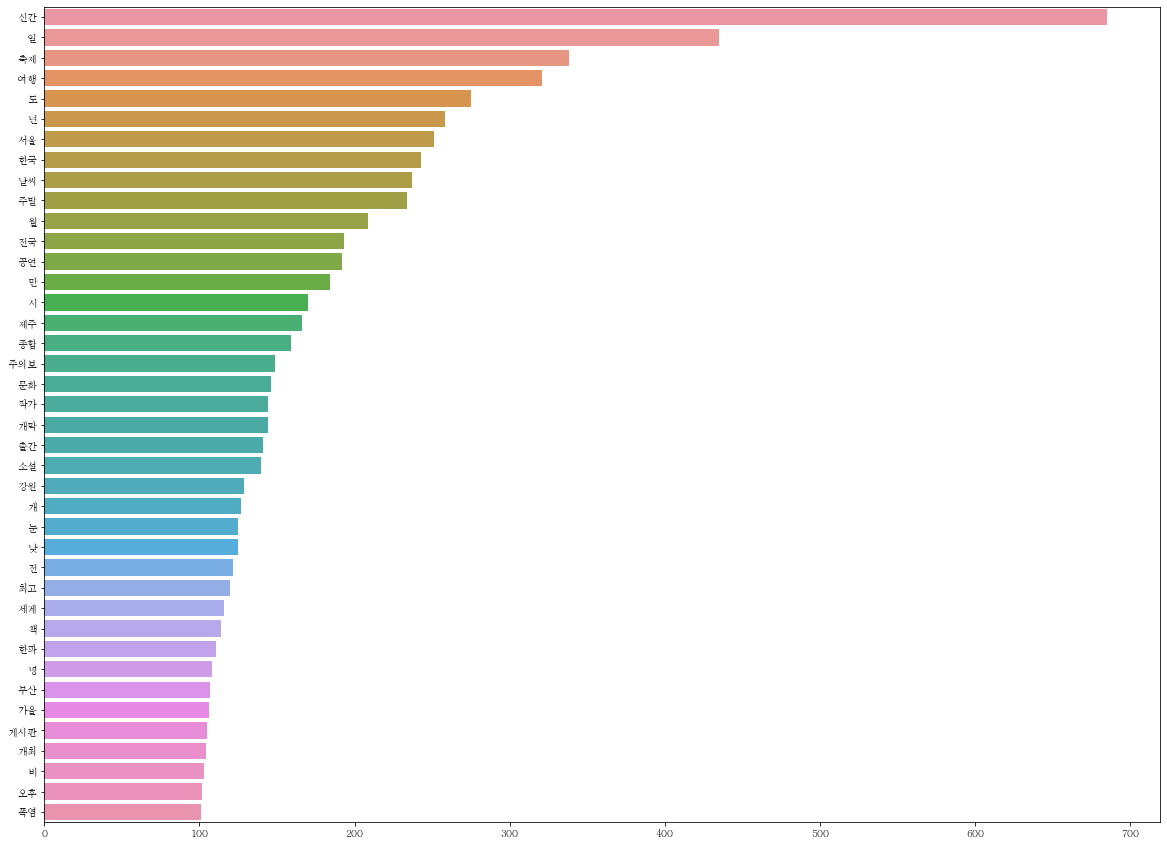

In [17]:
lifestyle_title = lifestyle["title"].to_list()
lifestyle_n_corpus = []
for t in lifestyle_title:
    lifestyle_n_corpus += m.nouns(t)
    
lifestyle_count = collections.Counter(lifestyle_n_corpus)
lifestyle_most = lifestyle_count.most_common()

x, y = [], []
for word, count in lifestyle_most[:40]:
    x.append(word)
    y.append(count)
    
plt.rcParams["font.family"] = 'batang'
plt.figure(figsize=(20,15))
sns.barplot(x=y, y=x)
    

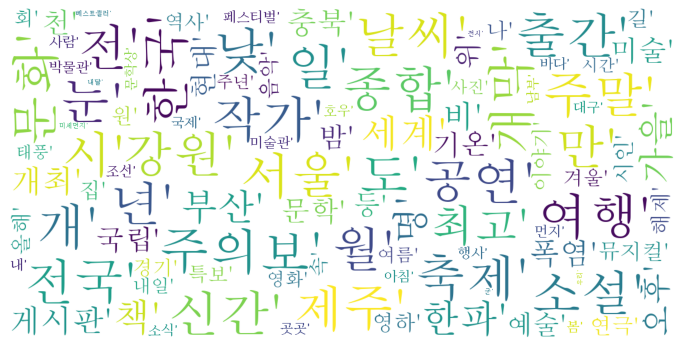

In [82]:
show_wordcloud(lifestyle_most)

In [60]:
# 날씨 관련 단어들, 지역이름 많고 년, 월, 일 같은 날짜 단어들이 사회 토픽과 겹침
lifestyle_most[:40]

[('신간', 685),
 ('일', 435),
 ('축제', 338),
 ('여행', 321),
 ('도', 275),
 ('년', 258),
 ('서울', 251),
 ('한국', 243),
 ('날씨', 237),
 ('주말', 234),
 ('월', 209),
 ('전국', 193),
 ('공연', 192),
 ('만', 184),
 ('시', 170),
 ('제주', 166),
 ('종합', 159),
 ('주의보', 149),
 ('문화', 146),
 ('작가', 144),
 ('개막', 144),
 ('출간', 141),
 ('소설', 140),
 ('강원', 129),
 ('개', 127),
 ('눈', 125),
 ('낮', 125),
 ('전', 122),
 ('최고', 120),
 ('세계', 116),
 ('책', 114),
 ('한파', 111),
 ('명', 108),
 ('부산', 107),
 ('가을', 106),
 ('게시판', 105),
 ('개최', 104),
 ('비', 103),
 ('오후', 102),
 ('폭염', 101)]

### 세계

<AxesSubplot:>

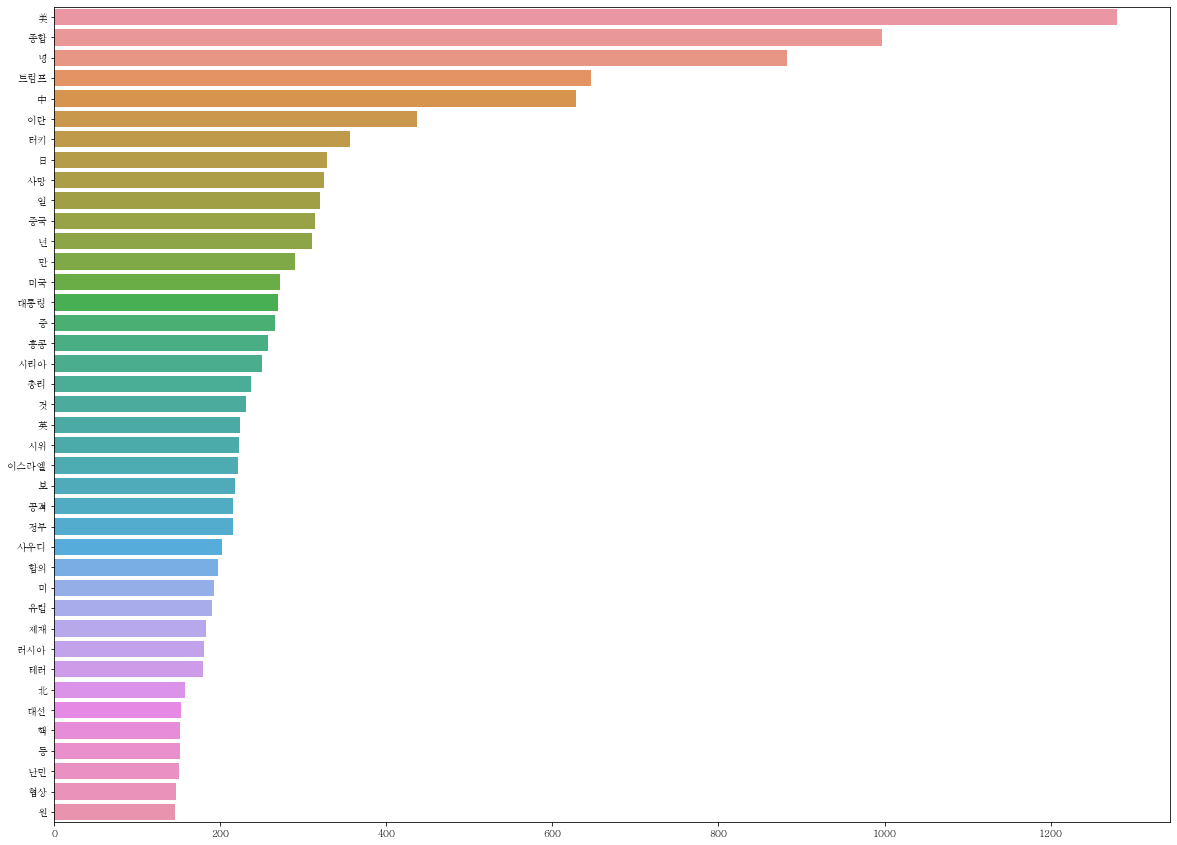

In [19]:
world_title = world["title"].to_list()
world_n_corpus = []

for t in world_title:
    world_n_corpus += m.nouns(t)
    
world_count = collections.Counter(world_n_corpus)
world_most = world_count.most_common()

x, y = [], []
for word, count in world_most[:40]:
    x.append(word)
    y.append(count)
    
plt.rcParams["font.family"] = 'batang'
plt.figure(figsize=(20,15))
sns.barplot(x=y, y=x)

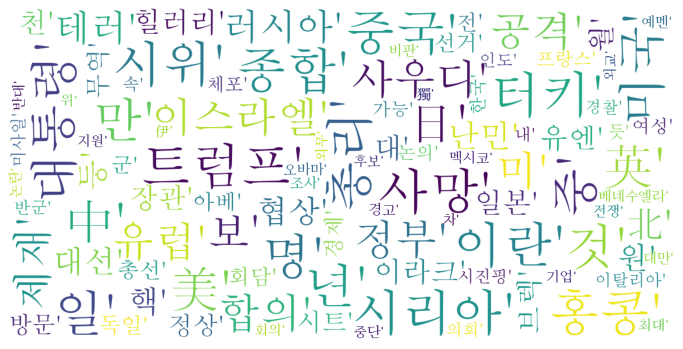

In [83]:
show_wordcloud(world_most)

In [62]:
# 국가 이름, 대통령이름 -> 혹시 test 때 뉴스 모집 시기가 달라 외국 대통령, 총리 이름 바뀌어 있으면? 
world_most[:40]

[('美', 1280),
 ('종합', 997),
 ('명', 883),
 ('트럼프', 647),
 ('中', 629),
 ('이란', 437),
 ('터키', 356),
 ('日', 328),
 ('사망', 325),
 ('일', 320),
 ('중국', 314),
 ('년', 311),
 ('만', 290),
 ('미국', 272),
 ('대통령', 270),
 ('중', 266),
 ('홍콩', 257),
 ('시리아', 250),
 ('총리', 237),
 ('것', 231),
 ('英', 224),
 ('시위', 223),
 ('이스라엘', 221),
 ('보', 218),
 ('공격', 215),
 ('정부', 215),
 ('사우디', 202),
 ('합의', 197),
 ('미', 192),
 ('유럽', 190),
 ('제재', 183),
 ('러시아', 180),
 ('테러', 179),
 ('北', 157),
 ('대선', 153),
 ('핵', 152),
 ('등', 151),
 ('난민', 150),
 ('협상', 147),
 ('원', 146)]

### 스포츠

<AxesSubplot:>

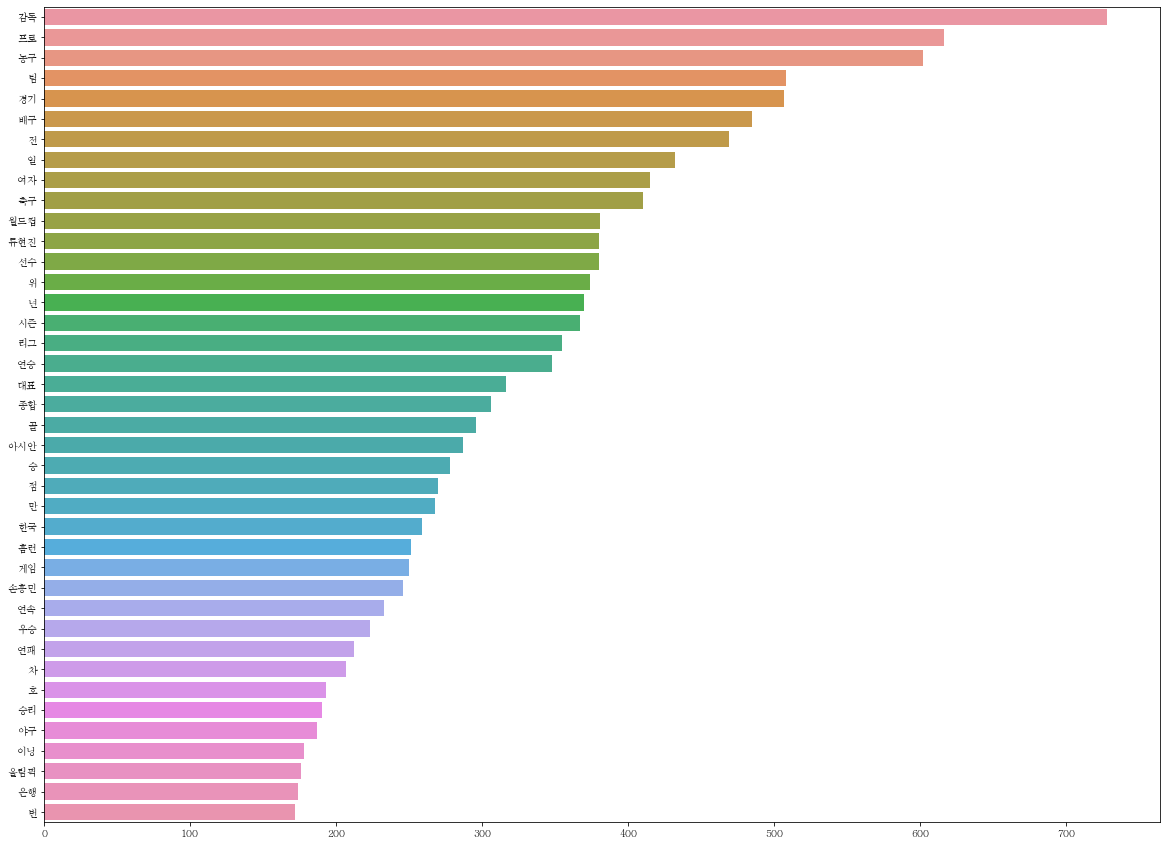

In [21]:
sports_title = sports["title"].to_list()
sports_n_corpus = []

for t in sports_title:
    sports_n_corpus += m.nouns(t)
    
sports_count = collections.Counter(sports_n_corpus)
sports_most = sports_count.most_common()

x, y = [], []
for word, count in sports_most[:40]:
    x.append(word)
    y.append(count)
    
plt.rcParams["font.family"] = 'batang'
plt.figure(figsize=(20,15))
sns.barplot(x=y, y=x)

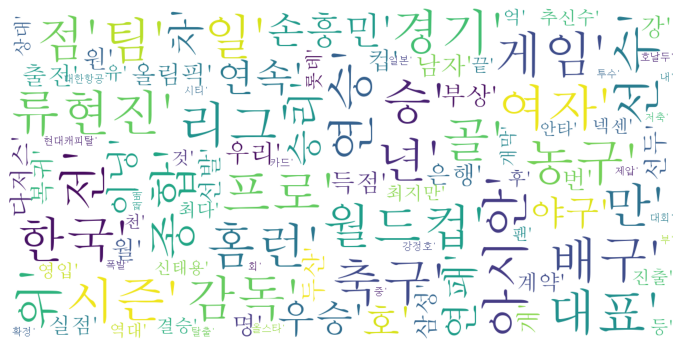

In [84]:
show_wordcloud(sports_most)

In [64]:
# 순위, 종목, 선수이름, 대회 (은행-> 팀 이름인데 경제랑 겹치는 부분)
sports_most[:40]

[('감독', 728),
 ('프로', 616),
 ('농구', 602),
 ('팀', 508),
 ('경기', 507),
 ('배구', 485),
 ('전', 469),
 ('일', 432),
 ('여자', 415),
 ('축구', 410),
 ('월드컵', 381),
 ('류현진', 380),
 ('선수', 380),
 ('위', 374),
 ('년', 370),
 ('시즌', 367),
 ('리그', 355),
 ('연승', 348),
 ('대표', 316),
 ('종합', 306),
 ('골', 296),
 ('아시안', 287),
 ('승', 278),
 ('점', 270),
 ('만', 268),
 ('한국', 259),
 ('홈런', 251),
 ('게임', 250),
 ('손흥민', 246),
 ('연속', 233),
 ('우승', 223),
 ('연패', 212),
 ('차', 207),
 ('호', 193),
 ('승리', 190),
 ('야구', 187),
 ('이닝', 178),
 ('올림픽', 176),
 ('은행', 174),
 ('번', 172)]

### 정치

<AxesSubplot:>

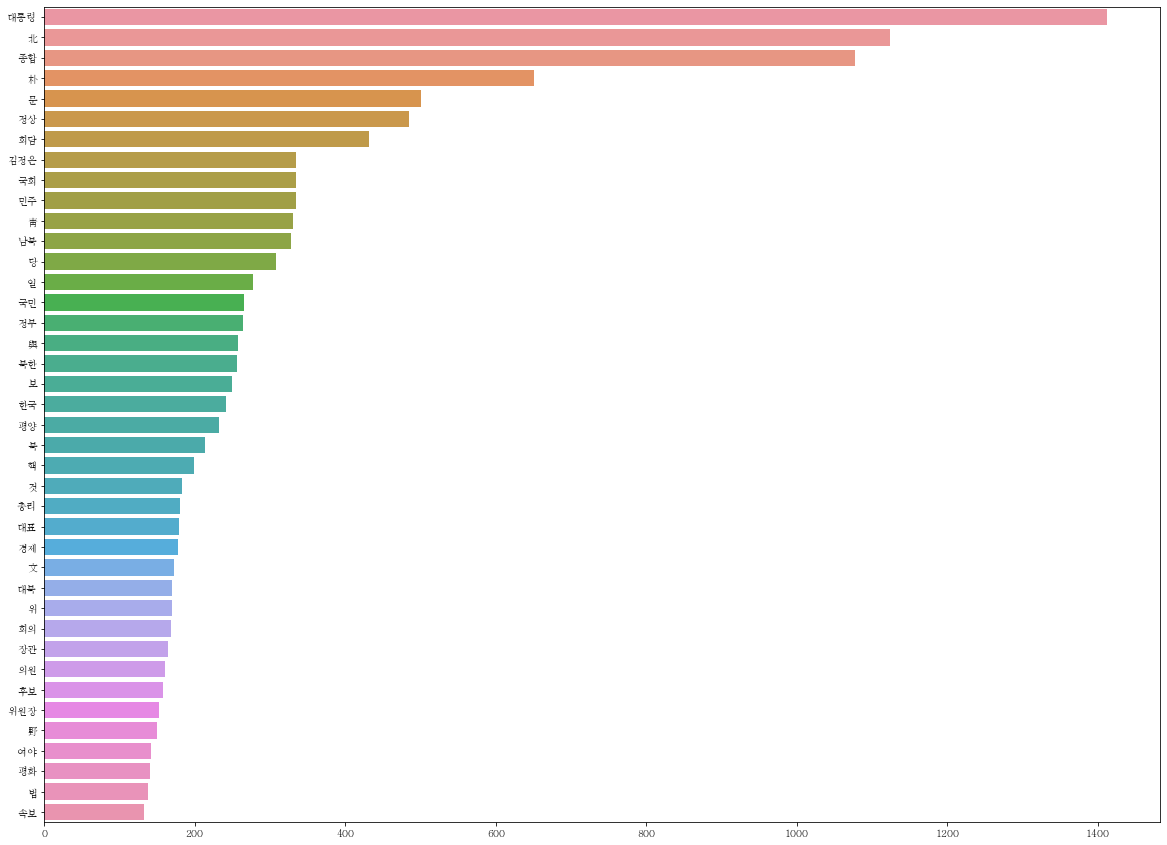

In [23]:
politic_title = politic["title"].to_list()
politic_n_corpus = []

for t in politic_title:
    politic_n_corpus += m.nouns(t)
    
politic_count = collections.Counter(politic_n_corpus)
politic_most = politic_count.most_common()

x, y = [], []
for word, count in politic_most[:40]:
    x.append(word)
    y.append(count)
    
plt.rcParams['font.family'] = 'batang'
plt.figure(figsize=(20,15))
sns.barplot(x=y, y=x)

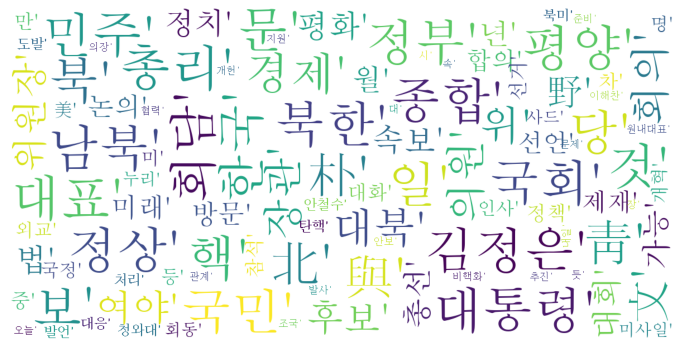

In [85]:
show_wordcloud(politic_most)

In [66]:
# 대통령 이름, 북한, 정치 용어, 세계 토픽이랑 겹치는 부분 많을 듯 -> 역시나 test 데이터셋에서는 우리나라 대통령 바뀌어 있으면?
politic_most[:40]

[('대통령', 1412),
 ('北', 1124),
 ('종합', 1077),
 ('朴', 651),
 ('문', 501),
 ('정상', 484),
 ('회담', 431),
 ('김정은', 335),
 ('국회', 335),
 ('민주', 334),
 ('靑', 331),
 ('남북', 328),
 ('당', 308),
 ('일', 278),
 ('국민', 265),
 ('정부', 264),
 ('與', 258),
 ('북한', 256),
 ('보', 249),
 ('한국', 241),
 ('평양', 232),
 ('북', 214),
 ('핵', 199),
 ('것', 183),
 ('총리', 181),
 ('대표', 179),
 ('경제', 178),
 ('文', 173),
 ('대북', 170),
 ('위', 170),
 ('회의', 168),
 ('장관', 164),
 ('의원', 160),
 ('후보', 158),
 ('위원장', 153),
 ('野', 150),
 ('여야', 142),
 ('평화', 140),
 ('법', 138),
 ('속보', 133)]

## - topic별 형태소 분석

품사 붙이는 행위: PoS(Part of Speech, 품사) Tagging  
references : https://needjarvis.tistory.com/730

In [93]:
def pos_tagging_barplot(data):
    tags = []

    for t in data:
        temp = m.pos(t)
        for p in temp:
            tags.append(p[1])
        
    counter = collections.Counter(tags)

    x, y = list(map(list, zip(*counter.most_common(10))))
    ax = sns.barplot(x=y, y=x)
    ax.set(xlabel="빈도 수", ylabel="형태소")

### IT / 과학

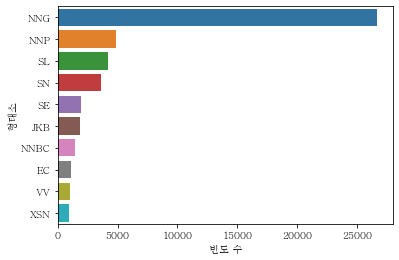

In [94]:
pos_tagging_barplot(itsci_title)

IT/과학 : NNG(보통명사), NNP(고유명사), **SL(외국어)**, SN(숫자)

### 경제

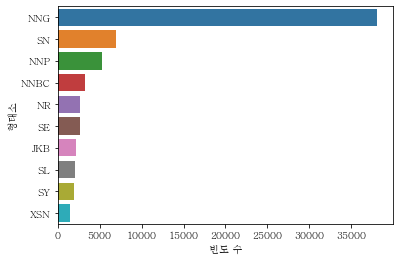

In [95]:
pos_tagging_barplot(econ_title)

경제 : NNG(보통명사), SN(숫자), NNP(고유명사)

### 생활문화

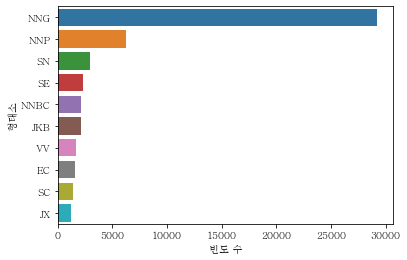

In [97]:
pos_tagging_barplot(lifestyle_title)

생활문화 : NNG(보통명사), NNP(고유명사), SN(숫자) 순

### 세계

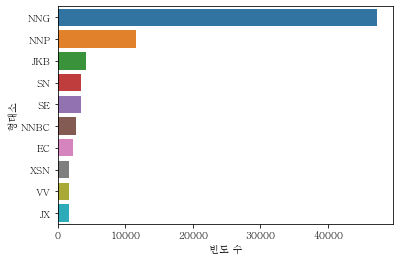

In [98]:
pos_tagging_barplot(world_title)

세계 : NNG(보통명사), NNP(고유명사), **JKB(부사격조사)**, SN(숫자)

### 스포츠

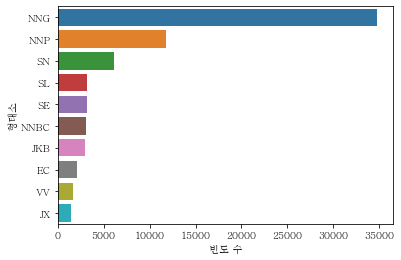

In [99]:
pos_tagging_barplot(sports_title)

스포츠 : NNG(보통명사), NNP(고유명사), SN(숫자)

### 정치

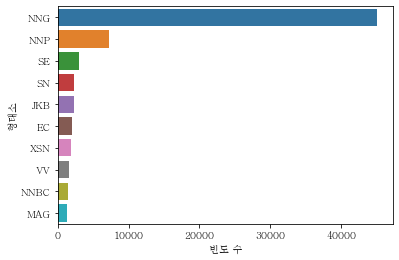

In [101]:
pos_tagging_barplot(politic_title)

정치 : NNG(보통명사), NNP(고유명사)